# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: Nick Peters**


Prepare the data

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# change the path so to access the data on your drive 
wine_data = pd.read_csv('/content/drive/MyDrive/CS167 Datasets/winequality-white.csv')

# Exercise #1. 
Implement mean squared error (mse) algorithm

In [4]:
def mse(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)

    # OUTPUT: 
    #   the mean squared error between the actual and predicted values
    error = 0
    for x in range(len(actual)):
      error += (actual.iloc[x]-predicted.iloc[x])**2
    
    error = error/len(actual)
    return error


# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [5]:
# change the path so to access the data on your drive 
wine_data = pd.read_csv('/content/drive/MyDrive/CS167 Datasets/winequality-white.csv')

# establish test_data and train_data here
shuffled_data = wine_data.sample(frac=1, random_state=30)
test_data = shuffled_data.iloc[0:320]
train_data = shuffled_data.iloc[320:]

# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [6]:
import numpy as np

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = np.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

In [7]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pd.Series(results)

In [8]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [9]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

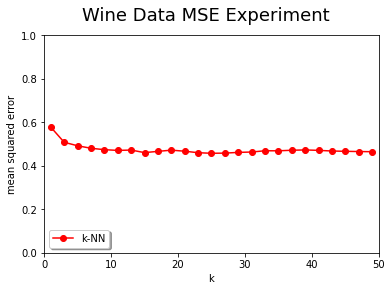

In [10]:
import matplotlib.pyplot as plt

k_vals = [x for x in range(0,50) if x%2 != 0] 
actual_vals = test_norm_data['quality']
kNN_mse = []

for x in k_vals:
  predicted = regressions_all_kNN(test_norm_data, train_norm_data, x)
  kNN_mse.append(mse(actual_vals, predicted))


plt.suptitle('Wine Data MSE Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.plot(k_vals,kNN_mse,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals[len(k_vals)-1]+1,0,1])
plt.show()

# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

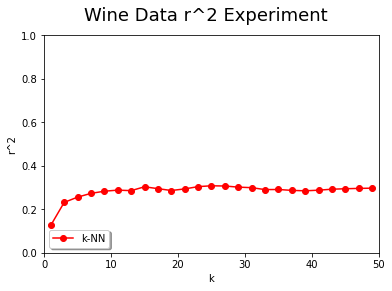

In [11]:
import sklearn.metrics

r2_vals = []

for x in k_vals:
  predicted_vals = regressions_all_kNN(test_norm_data, train_norm_data, x)
  r2_vals.append(sklearn.metrics.r2_score(actual_vals, predicted_vals))

plt.suptitle('Wine Data r^2 Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2')
plt.plot(k_vals,r2_vals,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,k_vals[len(k_vals)-1]+1,0,1])
plt.show()

# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

##Conclusions
Both the MSE and r^2 experiment indicate that k=1 yields the best results for the k-NN algorithm for this data set. For both the MSE and r^2 tests, it was revealed that k=1 perfectly fit the data. With the MSE test, it achieved a mean squared error of 0. With the r^2 test, it achieved a r^2 of 1. Past k=1, the kNN algorithm quickly lost accuracy then went into a slow descent.